In [1]:
##Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

C:\Users\Martin Berberi\AppData\Local\Continuum\anaconda3\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Martin Berberi\AppData\Local\Continuum\anaconda3\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Martin Berberi\AppData\Local\Continuum\anaconda3\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Martin Berberi\AppData\Local\Continuum\anaconda3\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  retu

In [2]:
##Load the dataset
df = pd.read_csv('heart.csv')

##Check top 5 rows
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
##Rename the columns in order to be easy to understand
df.rename(columns={'cp': 'chest_pain',
                   'trtbps': 'blood_pressure',
                   'chol': 'cholestoral',
                   'fbs': 'blood_sugar',
                   'restecg': 'electrocardiographic',
                   'thalachh': 'max_heart_rate_achieved',
                   'exng': 'exercise_induced_angina',
                   'oldpeak': 'old_peak',
                   'slp': 'slope',
                   'caa': 'number_vessels',
                   'thall': 'thal_rate'}, inplace = True)

In [4]:
##Check the updates
df.head()

,age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,old_peak,slope,number_vessels,thal_rate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain                 303 non-null int64
blood_pressure             303 non-null int64
cholestoral                303 non-null int64
blood_sugar                303 non-null int64
electrocardiographic       303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
old_peak                   303 non-null float64
slope                      303 non-null int64
number_vessels             303 non-null int64
thal_rate                  303 non-null int64
output                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
df.describe()

,age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,old_peak,slope,number_vessels,thal_rate,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


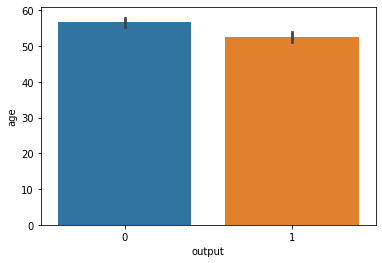

In [10]:
sns.barplot(data = df, x = 'output', y = 'age')

In [11]:
df.head()

,age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,old_peak,slope,number_vessels,thal_rate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


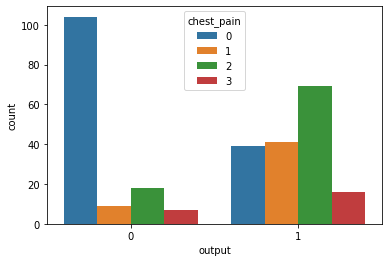

In [15]:
sns.countplot(data = df, x = 'output', hue = 'chest_pain')

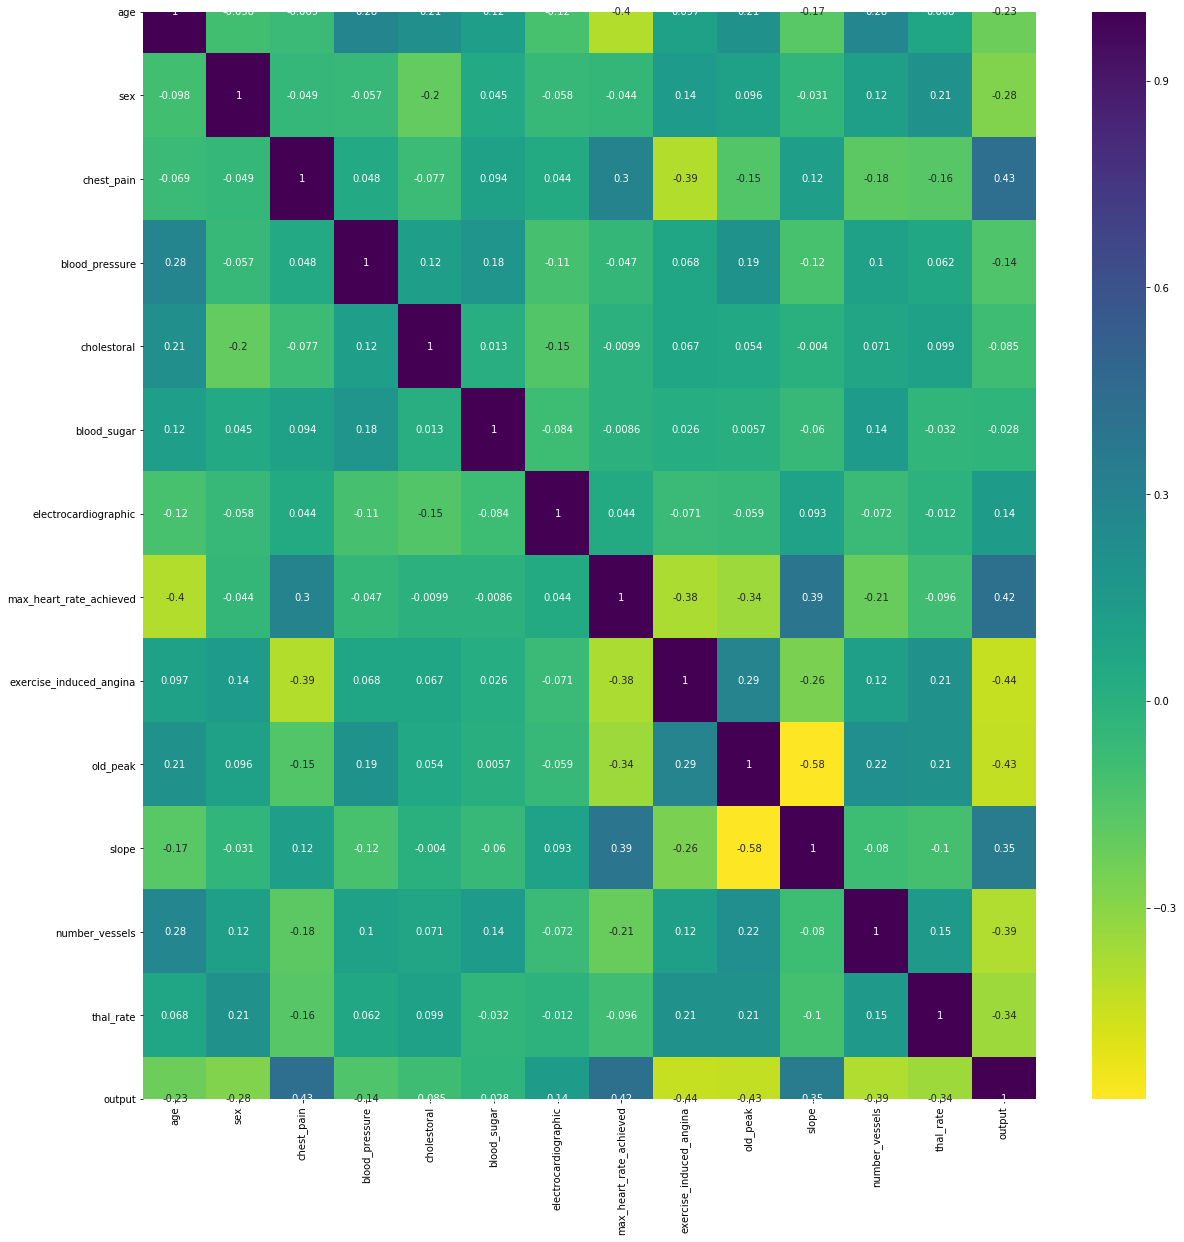

In [17]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis_r')

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier()

In [19]:
X = df.drop('output', axis = 1)
y = df['output']

In [20]:
tree.fit(X, y)

C:\Users\Martin Berberi\AppData\Local\Continuum\anaconda3\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

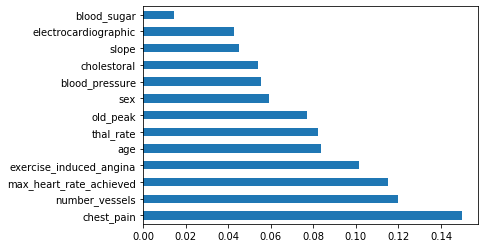

In [26]:
pd.Series(tree.feature_importances_, index=X.columns).nlargest(15).plot(kind = 'barh')

In [38]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

C:\Users\Martin Berberi\AppData\Local\Continuum\anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
accuracy_score(y_test, log_pred)

0.868421052631579

In [34]:
random = RandomForestClassifier()
random.fit(X_train, y_train)
random_pred = random.predict(X_test)

C:\Users\Martin Berberi\AppData\Local\Continuum\anaconda3\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
accuracy_score(y_test, random_pred)

0.8026315789473685

In [36]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [37]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [40]:
reg_opt = RandomizedSearchCV(estimator=random, param_distributions=random_grid,
                            cv = 5, verbose=2, n_iter=10, n_jobs=1)

In [41]:
reg_opt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=400, min_samples_split=15, min_s

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=1200, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [42]:
prediction = reg_opt.predict(X_test)

In [43]:
accuracy_score(y_test, prediction)

0.8552631578947368

In [54]:
import pickle
file = open('model.pkl', 'wb')
pickle.dump(log, file)

In [45]:
X.head()

,age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,old_peak,slope,number_vessels,thal_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [55]:
df['chest_pain'].unique()

array([3, 2, 1, 0], dtype=int64)